# **CARDIO ANALYSIS**

## **Business Understanding**

Cardiovascular diseases, particularly heart attacks, are a leading cause of death in India, which accounts for 17.7% of the world’s population. With rising urbanization, lifestyle diseases, and environmental challenges, heart disease remains a major public health issue. The lack of predictive analytics leads to late interventions and increased healthcare costs. As a data analyst, I have been assigned to develop predictive models leveraging patient data—demographics, medical history, and lifestyle factors—to identify high-risk individuals, improve early detection, and optimize healthcare resources.

## **Business Problem**
 Existing predictive models for heart attack risk **lack sufficient accuracy**, limiting their effectiveness in early detection and preventive care. While healthcare providers and policymakers have access to extensive patient data—covering demographics, lifestyle, and medical history—current models fail to deliver highly reliable predictions. This results in **misclassified risks**, **delayed interventions**, and **increased healthcare costs**.

## **Objectives**

The goal is to develop a predictive model that accurately assesses an individual's heart attack risk using available medical and lifestyle factors. The model will help healthcare professionals and policymakers implement early interventions.

### **Specific Objectives**
- Data Collection – Gather patient records, lifestyle habits, and environmental factors from reliable sources, ensuring data completeness.
- Data Understanding – Perform EDA to identify trends, correlations, and anomalies in the dataset.
- Data Preprocessing – Handle missing values, encode categorical variables, normalize numerical features, and address class imbalance.
- Data Analysis – Identify key predictors, apply machine learning models, optimize parameters, and evaluate performance.
- Data Visualization – Use plots, heatmaps, and dashboards to visualize data trends and insights.

## **Stakeholders**

- Healthcare Providers – Use predictive insights for early diagnosis and personalized treatment plans.
- Patients – Benefit from early warnings and recommendations to improve heart health.
- Government & Policymakers – Implement public health policies based on risk factors.
- Health Insurance Companies – Use risk assessment models for policy pricing and preventive healthcare initiatives.

## **Data Understanding**

>The dataset originates from **Kaggle** and contains **10,000** patient records from various states in India. It includes 26 features covering a wide range of factors such as demographics, medical history, lifestyle choices, socioeconomic conditions, and environmental influences.By leveraging this dataset, researchers and data analysts can identify key patterns, correlations, and risk indicators associated with heart disease, ultimately contributing to better preventive healthcare strategies.

### **Features Description**

- **Patient_ID** : Unique identifier for each patient.
- **State_Name** : Name of the Indian state where the patient resides.
- **Age**: Age of the patient in years.
- **Gender** : Biological sex of the patient (Male/Female).
- **Diabetes**: Indicates whether the patient has diabetes (1 = Yes, 0 = No).
- **Hypertension**: Indicates high blood pressure status (1 = Yes, 0 = No).
- **Obesity**: Indicates whether the patient is obese (1 = Yes, 0 = No).
- **Smoking**: Indicates whether the patient smokes (1 = Yes, 0 = No).
- **Alcohol_Consumption** :Indicates whether the patient consumes alcohol (1 = Yes, 0 = No).
- **Physical_Activity**:Indicates if the patient engages in physical exercise (1 = Yes, 0 = No).
- **Systolic_BP**: Upper reading of blood pressure (mmHg).
- **Diastolic_BP** :	Lower reading of blood pressure (mmHg).
- **Air_Pollution_Exposure** :Level of air pollution exposure (0 = Low, 1 = High).
- **Family_History** :Indicates if the patient has a family history of heart disease (1 = Yes, 0 = No).
- **Stress_Level** : Stress level score from 1 to 10.
- **Healthcare_Access**: Indicates whether the patient has access to healthcare (1 = Yes, 0 = No).
- **Heart_Attack_History** :Indicates if the patient has had a heart attack before (1 = Yes, 0 = No).
- **Emergency_Response_Time**: Time in minutes for emergency services to respond.
- **Annual_Income**	:Patient’s yearly income in Indian Rupees.
- **Health_Insurance** :Indicates if the patient has health insurance (1 = Yes, 0 = No).
- **Heart_Attack_Risk** :Predicted heart attack risk (1 = High, 0 = Low).

### **Import Modules**

In [1]:
#Importing necessary 

import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
class DataUnderstanding:
    def __init__(self, path):
        self.df = pd.read_csv(path)
       

    def basic_info(self):
        print("DISPLAY BASIC INFORMATION")
        print(f"Number of rows:{self.df.shape[0]}")
        print(f"Number of columns:{self.df.shape[1]}")

        print(self.df.dtypes)

    def summary_statistics(self):
        """Display summary statistics for numerical values"""
        print("Summary Statistics")
        print(self.df.describe())

        print(self.df.describe(include =['object']))

    def dataset_info(self):
        print("Info of the Dataset")
        print(self.df.info())

    def data_quality_checks(self):
        """Checks for missing values , duplicate rows, and unique values in the columns"""
        print("Checking for missing values")
        print(self.df.isnull().sum())

        print("Number uplicate Rows")
        print(self.df.duplicated().sum())

        print("Unique Vlaues pe Column")
        print(self.df.nunique())

# Correct way to instantiate the class
path = "heart_attack_prediction_india.csv"  # Ensure the file is in the correct location
data = DataUnderstanding(path)  # Fix: Creating an instance correctly

# Calling the methods
data.basic_info()
data.summary_statistics()
data.dataset_info()
data.data_quality_checks()


    

        





DISPLAY BASIC INFORMATION
Number of rows:10000
Number of columns:26
Patient_ID                  int64
State_Name                 object
Age                         int64
Gender                     object
Diabetes                    int64
Hypertension                int64
Obesity                     int64
Smoking                     int64
Alcohol_Consumption         int64
Physical_Activity           int64
Diet_Score                  int64
Cholesterol_Level           int64
Triglyceride_Level          int64
LDL_Level                   int64
HDL_Level                   int64
Systolic_BP                 int64
Diastolic_BP                int64
Air_Pollution_Exposure      int64
Family_History              int64
Stress_Level                int64
Healthcare_Access           int64
Heart_Attack_History        int64
Emergency_Response_Time     int64
Annual_Income               int64
Health_Insurance            int64
Heart_Attack_Risk           int64
dtype: object
Summary Statistics
        Patient

In [3]:
data.df.head()


,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


#### **Dataset Summary**
Total Rows: 10,000
Total Columns: 26

#### **Data Types:**
24 numerical columns (integer type)
2 categorical columns (State_Name, Gender)
The dataset no Missing Values: The dataset is complete, with no null values.
#### **Key Variables & Statistics**
##### **Demographics**

Age: Ranges from 20 to 79 years (Mean: 49.39).
Gender: Male (5516), Female (4484).
State_Name: 28 unique states, most common being Chhattisgarh (399 records).

##### **Health Factors**

Diabetes: 9.29% of patients have diabetes.
Hypertension: 24.69% have hypertension.
Obesity: 30.37% are obese.
Smoking Rate: 30.14% are smokers.
Alcohol Consumption: 35.28% consume alcohol.
Physical Activity: 59.58% engage in physical activity.
Diet Score: Ranges from 0 to 10 (Mean: 5.02).

##### **Heart Health Indicators**

Cholesterol Levels: Range 150–299 mg/dL (Mean: 224.75 mg/dL).
Triglyceride, LDL, HDL Levels: Measured but specific insights not provided.

##### **Blood Pressure:**

Systolic BP: Mean: 139.67 mmHg (Range: 110–180).
Diastolic BP: Mean: 89.31 mmHg (Range: 60–119).

##### **Other Risk Factors**

Air Pollution Exposure: 40.36% exposed to pollution.
Family History of Heart Disease: 31.13% have a history.
Stress Level: Mean 5.52 on a scale of 1–10.
Healthcare Access: 31.1% have access.
Heart Attack History: 15.25% have experienced a heart attack.

##### **Economic & Response Factors**

Annual Income: Ranges from 50,353 to 1,999,714 (Mean: 1,022,062).
Health Insurance: 34.47% have insurance.
Emergency Response Time: 206 minutes on average (Range: 10–399).
Target Variable - Heart Attack Risk
Heart Attack Risk Rate: 30.07% of individuals have a high heart attack risk.

#### **Key Observations**
- The dataset is balanced and complete with no missing values.
- Key risk factors (obesity, smoking, diabetes, cholesterol levels, stress) are well represented.
- Heart Attack Risk is 30%, meaning nearly 1 in 3 patients is at risk.
- Economic factors (income, health insurance) may impact healthcare access and outcomes.

## **Data Vizualization**

In [4]:
data.df.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


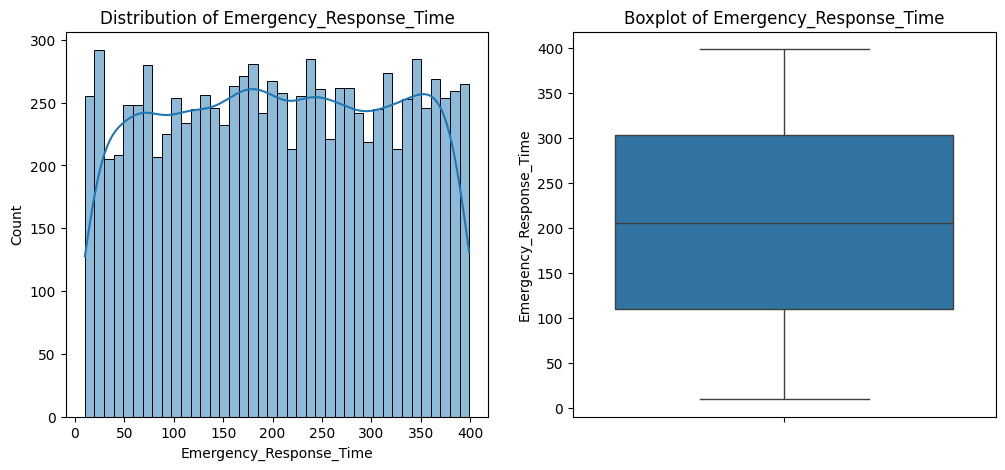

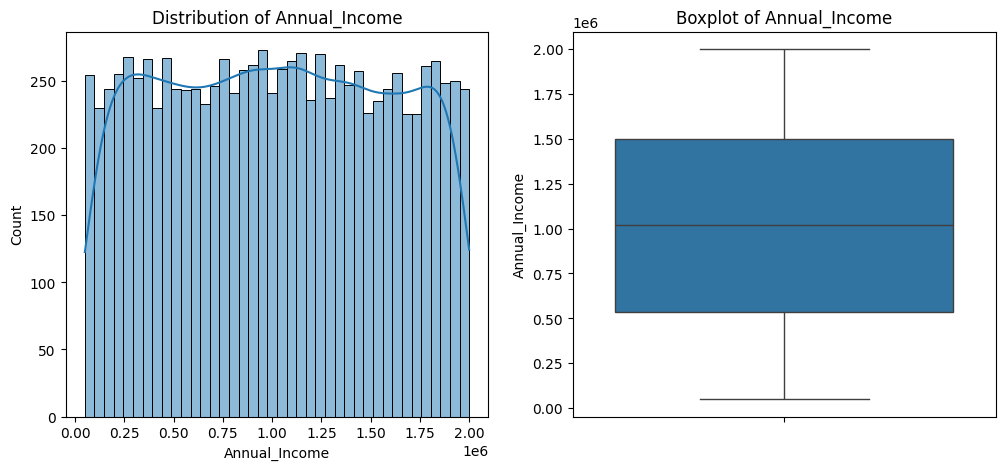

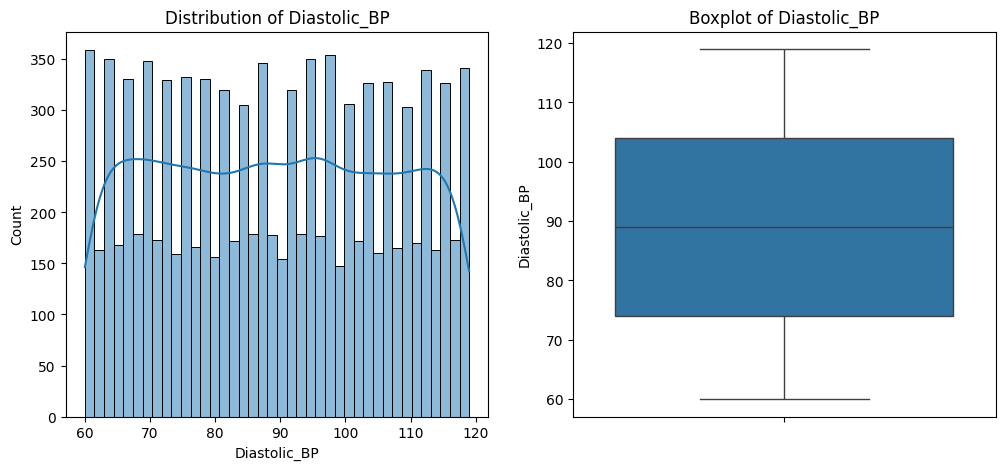

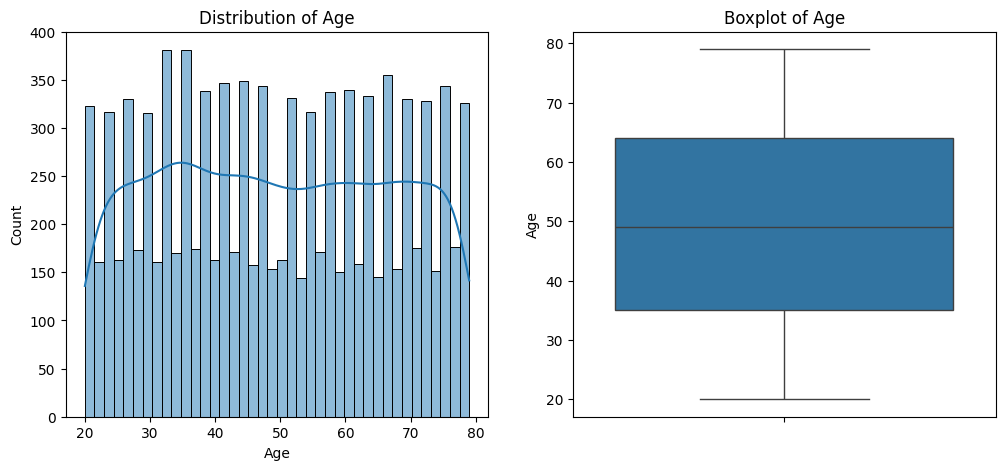

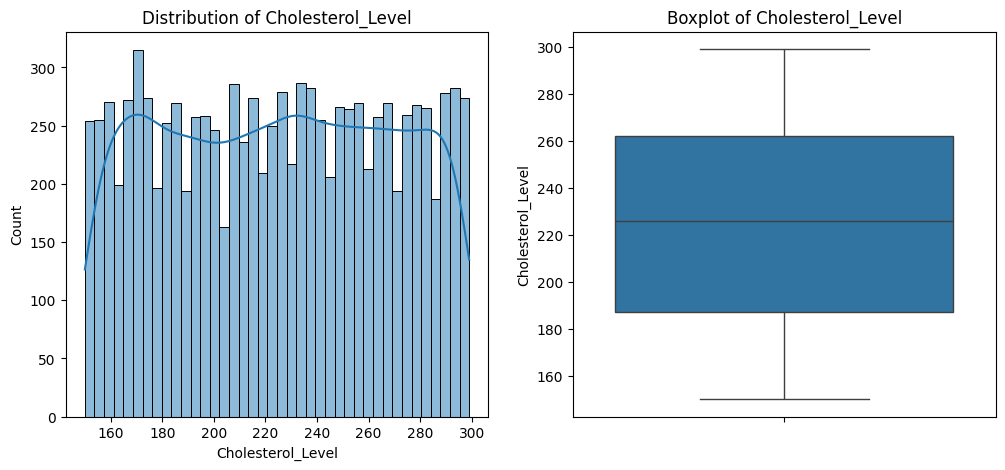

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


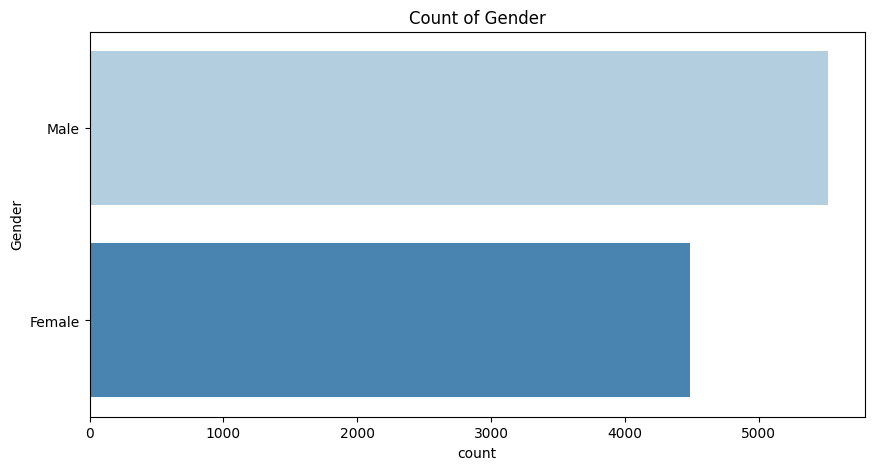

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


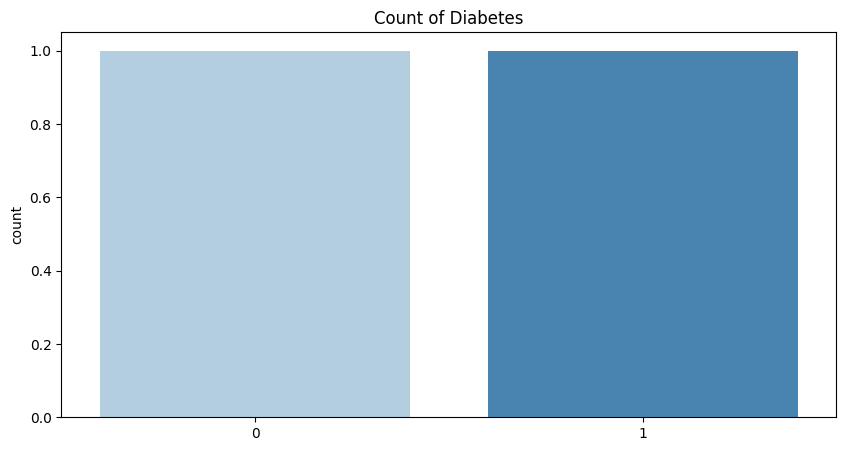

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


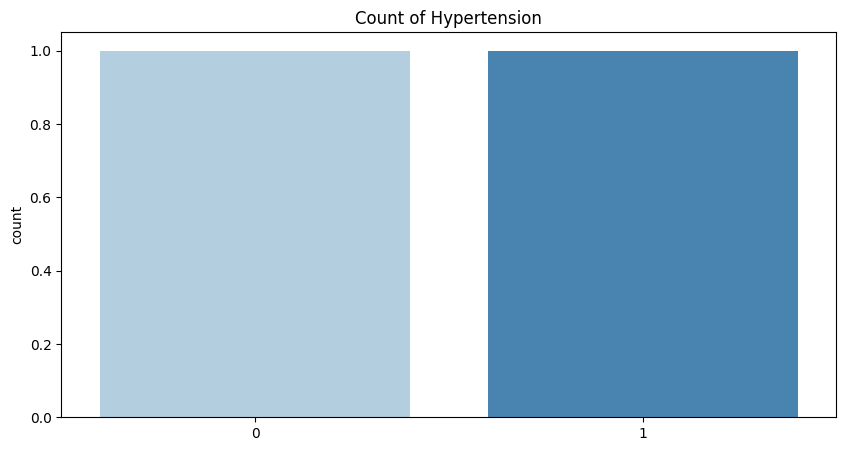

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


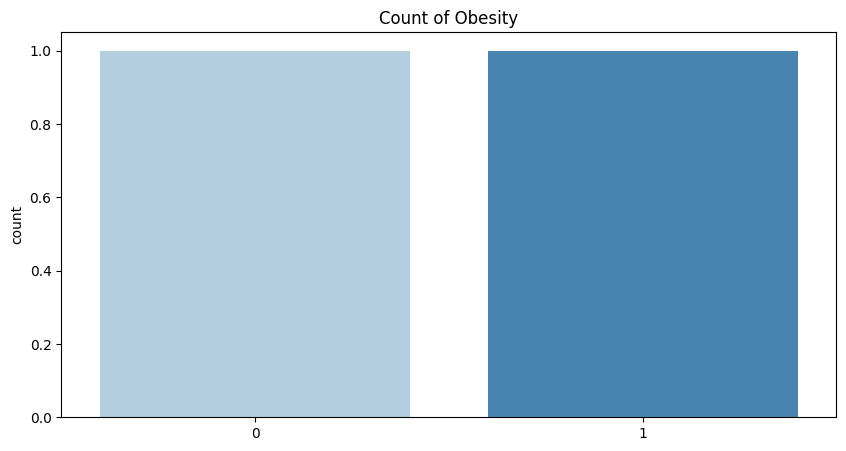

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


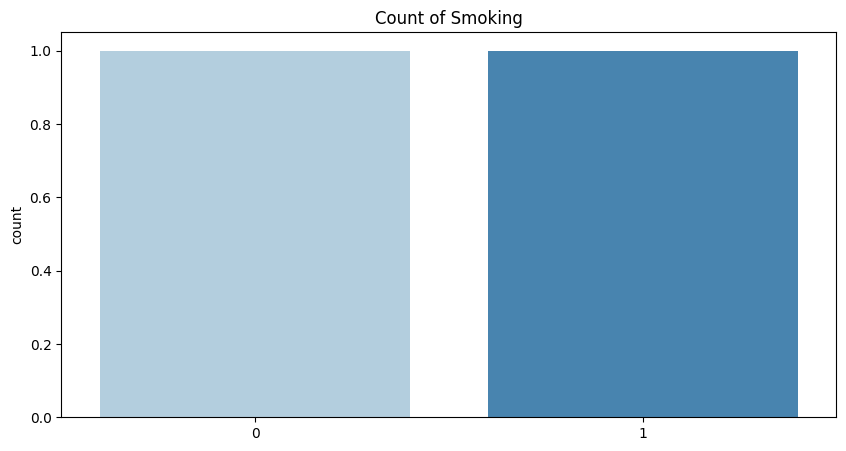

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


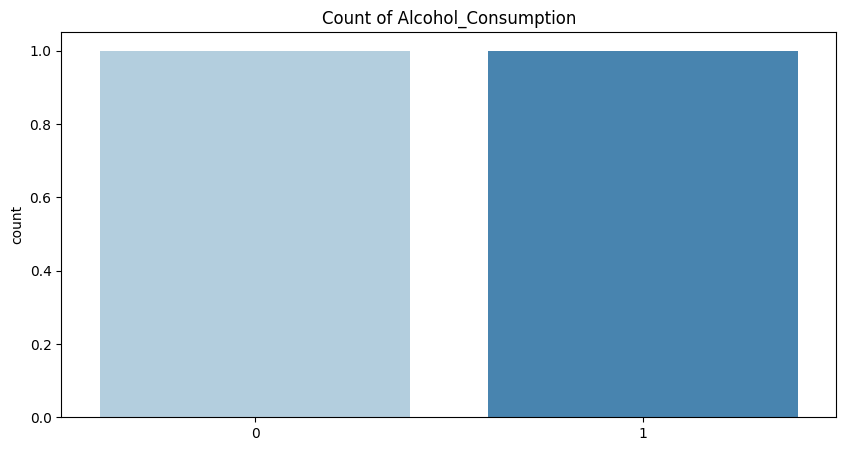

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


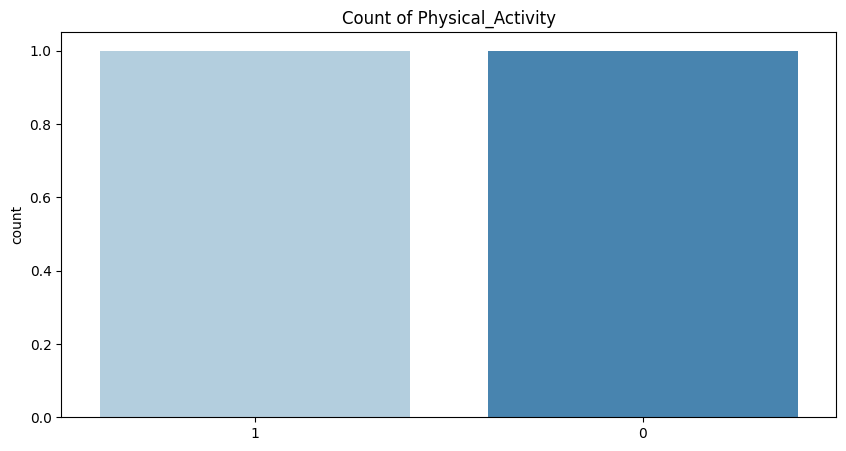

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


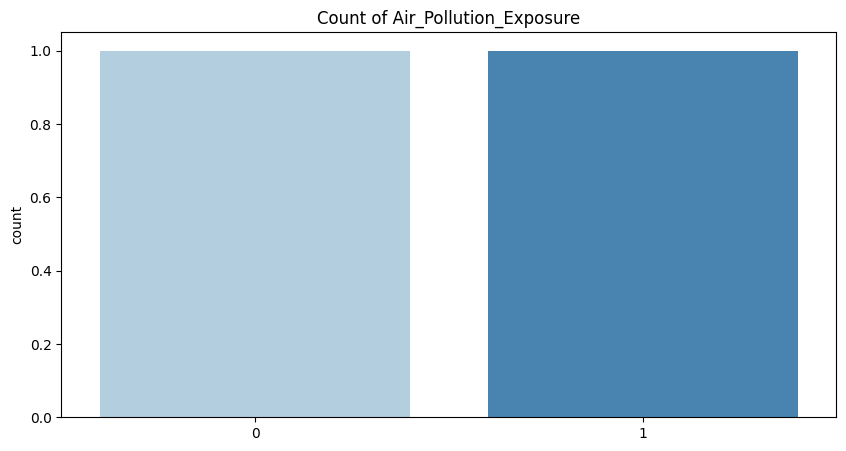

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


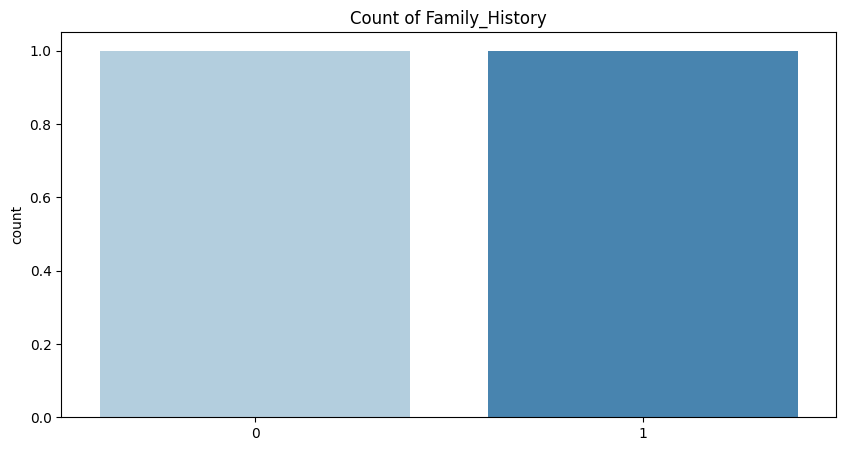

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


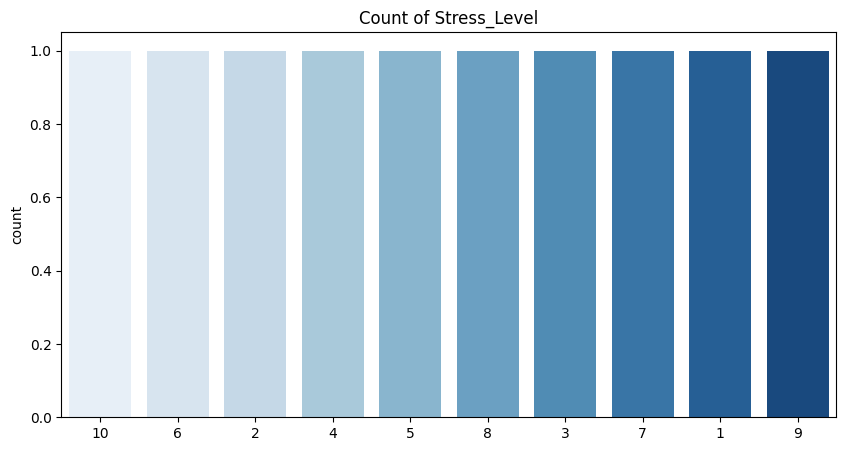

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


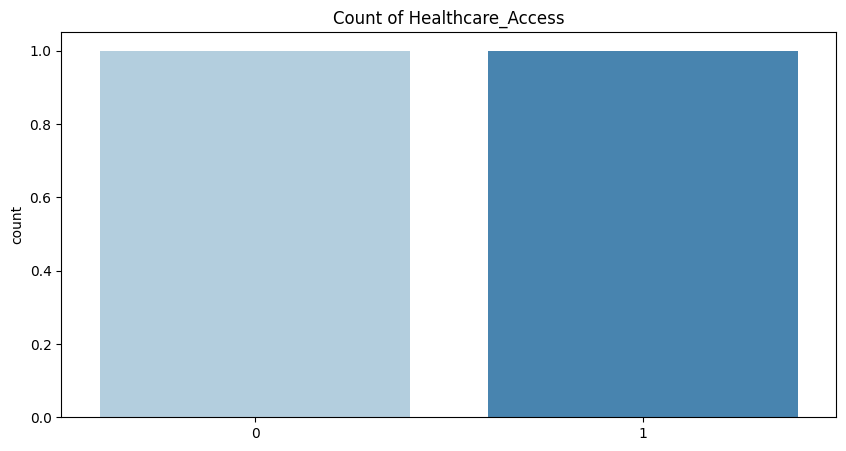

C:\Users\USER\AppData\Local\Temp\ipykernel_6936\2548660532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")


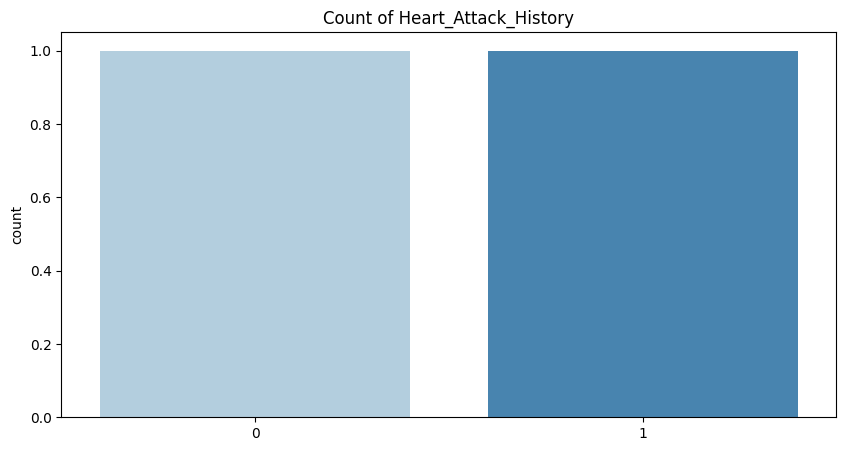

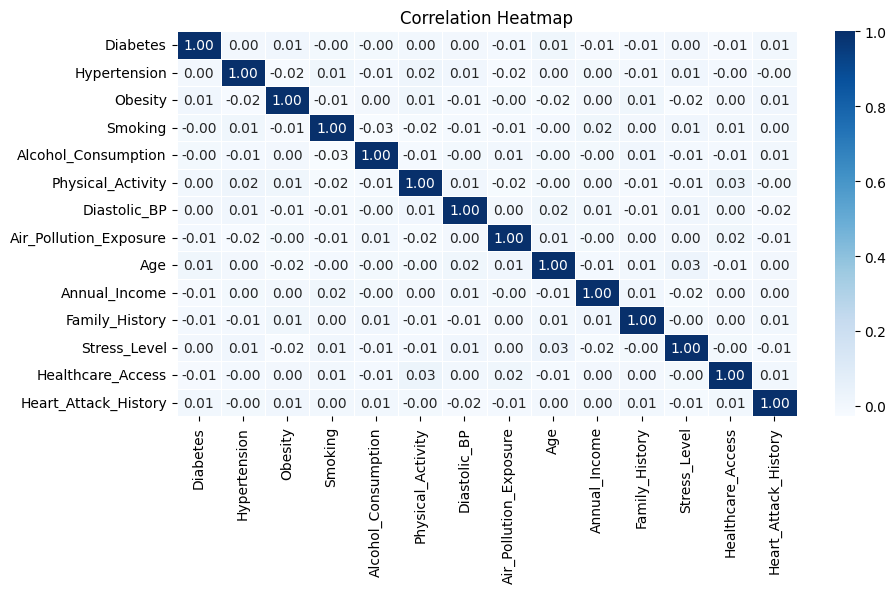

In [13]:


class UnivariateAnalysis:
    def __init__(self, df: pd.DataFrame):
        self.df = df
    
    def plot_numerical_distribution(self):
        """Plots histograms and boxplots for numerical variables."""
        numerical_cols = ['Emergency_Response_Time', 'Annual_Income', 'Diastolic_BP', 'Age','Cholesterol_Level']
        for col in numerical_cols:
            fig,ax = plt.subplots(1,2, figsize =(12,5))
            sns.histplot(self.df[col], bins = 40, kde = True, ax = ax[0])
            ax[0].set_title(f'Distribution of {col}')
            sns.boxplot(self.df[col], ax = ax[1])
            ax[1].set_title(f'Boxplot of {col}')
            plt.show()
    
    def plot_categorical_counts(self):
        cat_cols =['Gender','Diabetes','Hypertension', 'Obesity','Smoking','Alcohol_Consumption', 'Physical_Activity',
                      'Air_Pollution_Exposure',
                      'Family_History','Stress_Level' ,'Healthcare_Access' ,'Heart_Attack_History']
        for col in cat_cols:
            plt.figure(figsize =(10,5))
            sns.countplot(self.df[col], order = self.df[col].value_counts().index, palette="Blues")
            plt.title(f'Count of {col}')
            plt.show()
    
    
    
    def top_affected_countries(self):
        """Displays the top 10 most sold products by frequency."""
        plt.figure(figsize=(10, 5))
        top_country = self.df['State_Name'].value_counts().nlargest(10)
        sns.barplot(x= top_country.values, y= top_country.index)
        plt.title('Top 10 Most affected Countries')
        plt.xlabel('Number of affected Patients')
        plt.show()

    
    def heat_map(self):
        cat_cols =['Diabetes','Hypertension', 'Obesity','Smoking','Alcohol_Consumption', 'Physical_Activity',
                      'Diastolic_BP','Air_Pollution_Exposure','Age','Annual_Income',
                      'Family_History','Stress_Level' ,'Healthcare_Access' ,'Heart_Attack_History']
        plt.figure(figsize =(10,5))
        sns.heatmap(df[cat_cols].corr(),annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.show()

    
    def run_univariate_analysis(self):
        """Runs all univariate analysis methods."""
        self.plot_numerical_distribution()
        self.plot_categorical_counts()
        self.heat_map()

   


df = pd.read_csv("heart_attack_prediction_india.csv")
univariate = UnivariateAnalysis(df)
univariate.run_univariate_analysis()


## **Data Modelling**

### **Preprocessing**

##### **StandardScaling**

- Standard Scaling of Numerical Data
Since numerical features like **Age**, **Systolic_BP**, **Diastolic_BP**, **Stress_Level**, **Annual_Income**, and **Emergency_Response_Time** have different ranges, standardization is necessary.

- StandardScaler is applied to transform the data so that it has a mean of 0 and a standard deviation of 1.
This process improves model performance, especially for algorithms that rely on distance calculations for Example the k-NN, SVM, and logistic regression models.
- Standardizing numerical features ensures uniformity and prevents certain features from dominating due to larger scales.

In [6]:
numerical_cols = ['Age', 'Diastolic_BP','Stress_Level','Emergency_Response_Time','Annual_Income']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# Check for the transformed data



In [7]:
df.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,-0.427960,Female,0,0,1,1,0,0,...,1.706637,1,0,-0.529915,0,0,-0.439408,-0.733249,0,0
1,2,Himachal Pradesh,-1.353916,Male,0,0,0,0,1,1,...,1.476694,0,0,0.516796,0,0,1.108826,-1.511917,0,0
2,3,Assam,1.655442,Male,0,0,1,0,0,1,...,1.591665,0,1,1.563507,1,0,-0.181369,1.316607,1,0
3,4,Odisha,0.497997,Male,1,0,1,0,0,1,...,-1.397594,0,0,-1.576626,1,1,1.046541,0.671015,0,0
4,5,Karnataka,-1.585405,Male,0,0,0,0,0,1,...,1.131779,0,0,1.214604,0,0,0.023282,-1.648457,0,1


##### **OneHot Encoding**

- Categorical variables such as **State_Name** and **Gender** need to be converted into numerical values for machine learning models to process them effectively.

- One-Hot Encoding (OHE) is used for nominal variables (e.g., State_Name), creating separate binary columns for each category.
Label Encoding is applied to ordinal variables if applicable, assigning numerical values based on order.
Encoding ensures that categorical features contribute meaningfully to model predictions.

In [8]:
encoder = OneHotEncoder(sparse_output = False, drop ="first")
categorical_cols = ['State_Name','Gender']
encoded_data = encoder.fit_transform(df[categorical_cols])
# Convert Encoded Data to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with Original Data (Dropping Original Categorical Columns)
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# Display Result
df

,Patient_ID,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Gender_Male
0,1,-0.427960,0,0,1,1,0,0,9,248,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-1.353916,0,0,0,0,1,1,4,272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1.655442,0,0,1,0,0,1,6,268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.497997,1,0,1,0,0,1,9,224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,-1.585405,0,0,0,0,0,1,5,277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,-1.701149,0,0,0,1,0,1,6,160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,9997,-0.890938,0,0,0,0,0,0,5,257,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,9998,1.539697,0,0,0,0,0,0,2,205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,9999,0.150763,0,0,0,0,0,1,5,155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
class Modelling:
    def __init__(self, models = None):
        self.df = df
        self.results = {}


        # Models to be trained
        if models is None:
            self.models = {
                "Logistic Regression":LogisticRegression(),
                "Random Forest":RandomForestClassifier(),
                "KNN": KNeighborsClassifier()
            }
        else:
            self.models = models
              
    
    def train_and_evaluate(self, X, y, test_size = 0.2, random_state = 42):
        """
        Traina nd Evaluate the Models"""

        X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=random_state, test_size=test_size)
        for name, model in self.models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            metrics ={
                "Accuracy": accuracy_score(y_test, y_pred),
                "Recall":recall_score ( y_test,y_pred ),
                "Precision": precision_score(y_test, y_pred, average="weighted"),
                # "classification- Report":classification_report(y_test, y_pred)
                    }
            
            self.results[name] = metrics
            print(f"\n{name} performance:")
            for metric, value in metrics.items():
                print(f"{metric}: {value:.4f}")

                
                


    def get_best_model(self):
        """
        Identify the Best Model
        """
        best_model = max(self.results, key=lambda x:self.results[x]["Recall"])
        print(f"\n Best Model:{best_model} with Recall: {self.results[best_model]['Recall']:.4f}")
        return best_model, self.results[best_model]



    

In [10]:
df

,Patient_ID,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Gender_Male
0,1,-0.427960,0,0,1,1,0,0,9,248,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-1.353916,0,0,0,0,1,1,4,272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1.655442,0,0,1,0,0,1,6,268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.497997,1,0,1,0,0,1,9,224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,-1.585405,0,0,0,0,0,1,5,277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,-1.701149,0,0,0,1,0,1,6,160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,9997,-0.890938,0,0,0,0,0,0,5,257,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,9998,1.539697,0,0,0,0,0,0,2,205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,9999,0.150763,0,0,0,0,0,1,5,155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
 

# Load dataset
# df = pd.read_csv("heart_attack_prediction_india.csv")  # Replace with your dataset
X = df.drop(columns=["Heart_Attack_Risk"])
y = df["Heart_Attack_Risk"]

# Initialize and train models
trainer = Modelling()
trainer.train_and_evaluate(X, y)

# Get the best model
best_model, best_metrics = trainer.get_best_model()

c:\Users\USER\OneDrive\Documents\Projects\CardioAnalysis\cardio\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\OneDrive\Documents\Projects\CardioAnalysis\cardio\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression performance:
Accuracy: 0.7055
Recall: 0.0000
Precision: 0.4977



Random Forest performance:
Accuracy: 0.7055
Recall: 0.0034
Precision: 0.6453

KNN performance:
Accuracy: 0.6380
Recall: 0.1528
Precision: 0.5807

 Best Model:KNN with Recall: 0.1528


## **Model Evaluation**

## **Recommendations**

## **Deployment**